# Módulo necesarios

In [3]:
import json
import mysql.connector
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Pasar archivo JSON a tabla MYSQL

In [8]:
mydb = mysql.connector.connect(
    host='localhost',
    user='root',
    password='',
    database='mineria_db'
)

In [13]:
df_json = pd.read_json('data/people.json')
df_json

,id,full_name,email_address,country,gender
0,1,Lynelle Rembrandt,lrembrandt0@sogou.com,Burkina Faso,F
1,2,Kerri Olenchenko,kolenchenko1@webmd.com,Philippines,F
2,3,Coriss Monaghan,cmonaghan2@businesswire.com,China,F
3,4,Kerry Feronet,kferonet3@people.com.cn,Russia,M
4,5,Wynny Lunny,wlunny4@statcounter.com,Mexico,F
...,...,...,...,...,...
95,96,Cooper Brenneke,cbrenneke2n@archive.org,Colombia,M
96,97,Gearard Budge,gbudge2o@dailymail.co.uk,Belarus,M
97,98,Dianne Immer,dimmer2p@buzzfeed.com,Philippines,F
98,99,Tanya Scranny,tscranny2q@mail.ru,China,F


In [101]:
with open('data/people.json') as file:
    j = json.load(file)

In [102]:
mycursor = mydb.cursor()

In [103]:
for item in j:
    mycursor.execute("insert into people(id,full_name,email_address,country,gender) value(%s,%s,%s,%s,%s)",
                     (item["id"], item["full_name"], item["email_address"],item["country"],item["gender"]))
    mydb.commit()

### Limpieza de datos archivo CSV, generar archivo JSON y testeo archivo JSON

In [116]:
vgsales = pd.read_csv("data/vgsales.csv")

#Elimine todas las filas con valores nulos de la columna “Publisher”.
vgsales = vgsales[vgsales['Publisher'].notna()]

#Rellene con el valor cero todas las celdas de la columna “Year” que tengan valores nulos.
vgsales = vgsales.fillna({'Year': 0})

#Elimine las columnas “NA_Sales”, “EU_Sales”, “JP_Sales” y “Other_Sales”.
vgsales = vgsales.drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)

#Exporte los datos del DataFrame resultante después de haber aplicado las operaciones anteriores
#a un archivo en formato JSON llamado “vgsales.json”.
vgsales_1=vgsales.to_json("data/vgsales.json", orient = 'records') 

#En un nuevo DataFrame importe los datos del archivo JSON y muestre las columnas “Rank” y “Name” 
#de los primeros 10 y de los últimos 10 registros cuya columna “Platform” sea igual a “PS4”.
vgsales_2=pd.read_json("data/vgsales.json")
ps4=vgsales_2[(vgsales_2.Platform =='PS4')] 
diez=pd.concat([(ps4.loc[:, ['Rank','Name','Platform']].head(10)), (ps4.loc[:, ['Rank','Name','Platform']].tail(10))])
diez



,Rank,Name,Platform
33,34,Call of Duty: Black Ops 3,PS4
44,45,Grand Theft Auto V,PS4
77,78,FIFA 16,PS4
92,93,Star Wars Battlefront (2015),PS4
93,94,Call of Duty: Advanced Warfare,PS4
109,110,Fallout 4,PS4
124,125,FIFA 15,PS4
154,155,Destiny,PS4
221,222,FIFA 17,PS4
236,237,The Last of Us,PS4


In [115]:
print('total de registros:',ps4.shape[0])

total de registros: 336


### Gráfico evolución del crecimiento de la población en 3 paises

In [61]:
countries = pd.read_csv("data/countries.csv")
Argentina = countries[(countries["country"]=="Argentina")]
Spain = countries[(countries["country"]=="Spain")]
Chile = countries[(countries["country"]=="Chile")]

In [77]:
Ar_po = Argentina["population"]
Ch_po = Chile["population"]
Sp_po = Spain["population"]
year = Argentina["year"]

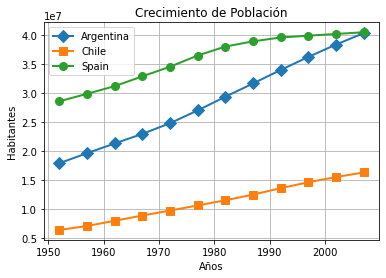

In [104]:
plt.plot(year, Ar_po, marker="D", lw="2", markersize="8")
plt.plot(year, Ch_po, marker="s", lw="2", markersize="8")
plt.plot(year, Sp_po, marker="o", lw="2", markersize="8")
plt.xlabel("Años")
plt.ylabel("Habitantes")
plt.grid()
plt.title("Crecimiento de Población")
plt.legend(["Argentina","Chile","Spain"])


In [ ]:
#                                            :)